In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_cleaned = pd.read_pickle('D:/ET-AL/Jarvis_cfid/data_cleaned.pkl')

## Plot formation energy distribution

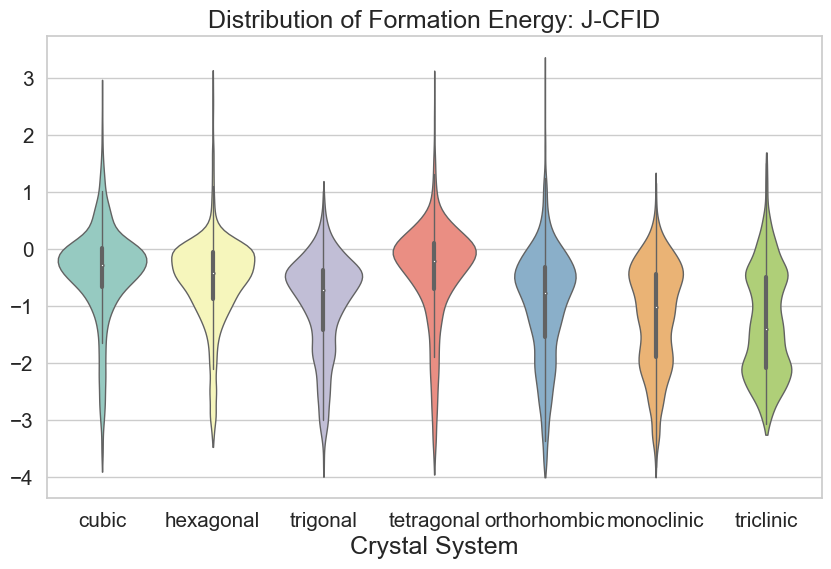

In [3]:
sns.set(font_scale=1.35, style='whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
large_font = {'fontsize':18}
order = ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic', 'triclinic']
sns.violinplot(data=data_cleaned, x='crys', y='formation_energy_peratom', palette='Set3', bw=.2, cut=1, linewidth=1, order=order)
# ax.set(ylim=(-.7,2))
plt.title('Distribution of Formation Energy: J-CFID', fontdict=large_font)
plt.xlabel('Crystal System', fontdict=large_font)
plt.ylabel('')
plt.savefig("D:/ET-AL/plots/E_jarvis.svg")
# plt.savefig("D:/ET-AL/plots/E_jarvis.png", dpi=200)

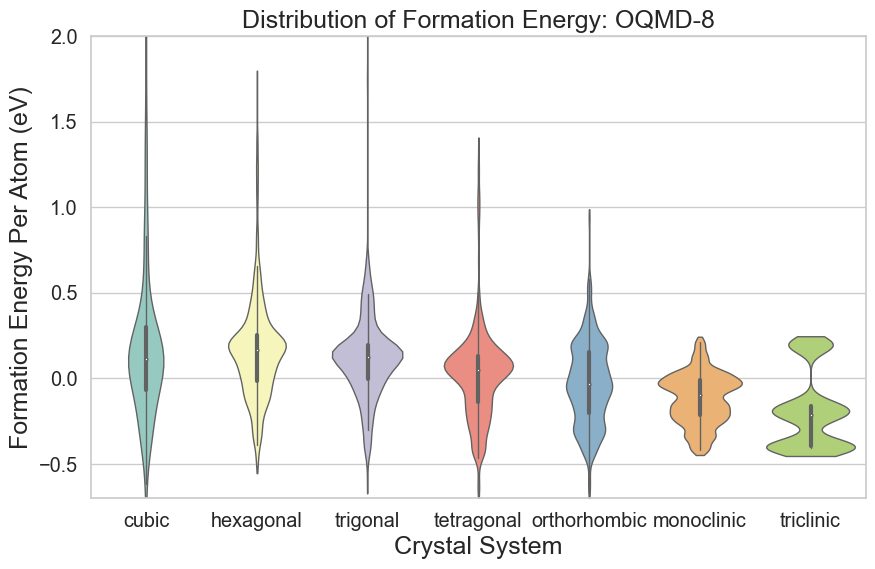

In [5]:
OQMD_data = pd.read_csv('D:/ET-AL/OQMD_xtalsys.csv')
sns.set(font_scale=1.3, style='whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
order = ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic', 'triclinic']
sns.violinplot(data=OQMD_data, x='crystal_system', y='energy', palette='Set3', bw=.2, cut=1, linewidth=1, order=order)
ax.set(ylim=(-.7,2))
plt.title('Distribution of Formation Energy: OQMD-8', fontdict=large_font)
plt.ylabel('Formation Energy Per Atom (eV)', fontdict=large_font)
plt.xlabel('Crystal System', fontdict=large_font)
plt.savefig("D:/ET-AL/plots/E_OQMD_8els.svg")
# plt.savefig("D:/ET-AL/plots/E_OQMD_8els.png", dpi=200)

## Plot information entropy

In [6]:
from scipy.stats import differential_entropy
differential_entropy(data_cleaned['formation_energy_peratom'])

entropies = pd.DataFrame(columns=['OQMD-8', 'J-CFID', 'crys'])
entropies['crys'] = ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic', 'triclinic']

for id, row in entropies.iterrows():
    row['OQMD-8'] = differential_entropy(OQMD_data[OQMD_data['crystal_system']==row['crys']]['energy'])
    row['J-CFID'] = differential_entropy(data_cleaned[data_cleaned['crys']==row['crys']]['formation_energy_peratom'])


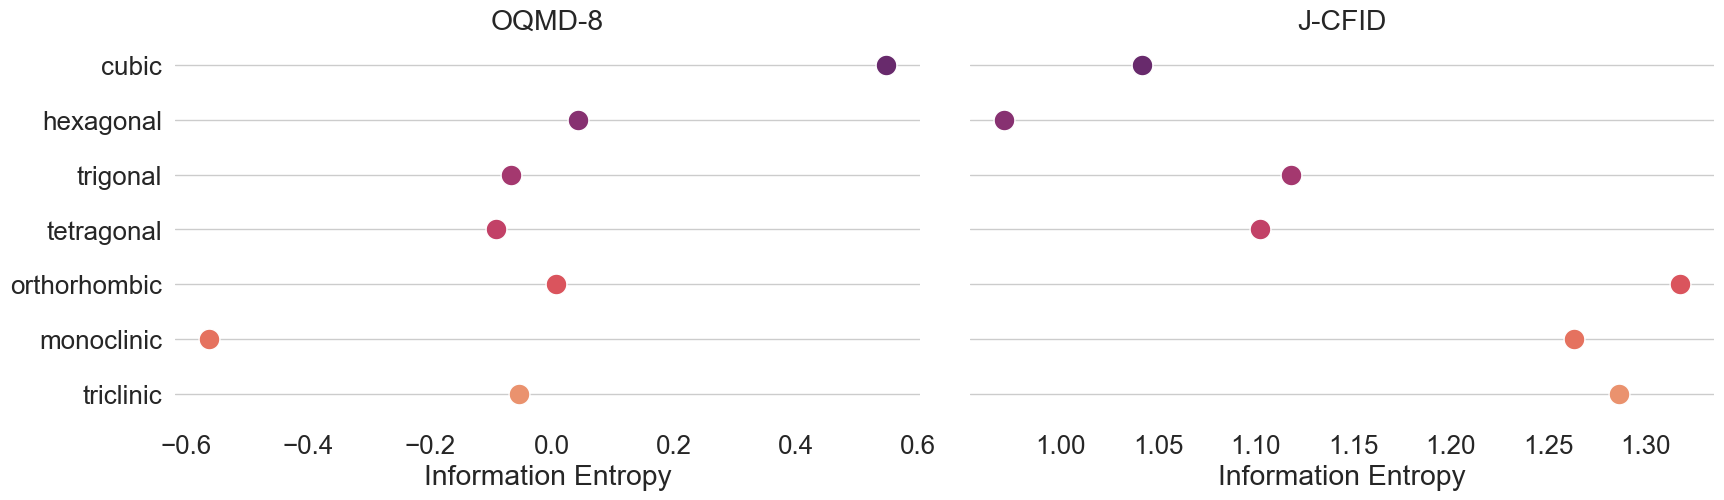

In [7]:
sns.set_theme(style='whitegrid', font_scale=1.7)


g = sns.PairGrid(entropies, x_vars=entropies.columns[:-1], y_vars=["crys"],
                 height=5, aspect=1.7)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=15, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlabel="Information Entropy", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['OQMD-8', 'J-CFID']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.savefig("D:/ET-AL/plots/info_entropy_grid.svg", bbox_inches='tight')
# plt.savefig("D:/ET-AL/plots/info_entropy_grid.png", dpi=200, bbox_inches='tight')

## Post-process results
Create plots from ET-AL experiment results.

### Information entropy evolution

In [8]:
results_path = 'D:/ET-AL/Results/Jarvis_term_1000_cleaned/'
entropies = pd.read_pickle(results_path + 'info_entropy_evolution.pkl')
entropies

,cubic,orthorhombic,trigonal,hexagonal,tetragonal,monoclinic,triclinic
0,1.163909,0.329138,0.927769,0.976069,0.719418,1.264707,1.329689
1,1.163909,0.711689,0.927769,0.976069,0.719418,1.264707,1.329689
2,1.163909,0.675517,0.927769,0.976069,0.719418,1.264707,1.329689
3,1.163909,0.734083,0.927769,0.976069,0.719418,1.264707,1.329689
4,1.163909,0.734083,0.927769,0.976069,0.889702,1.264707,1.329689
...,...,...,...,...,...,...,...
950,1.580706,1.616853,1.433008,1.427548,1.594200,1.438892,1.395791
951,1.580706,1.616853,1.433008,1.427548,1.593301,1.438892,1.395791
952,1.580706,1.616853,1.433008,1.427548,1.592847,1.438892,1.395791
953,1.580706,1.616853,1.433008,1.427548,1.592368,1.438892,1.395791


cubic
orthorhombic
trigonal
hexagonal
tetragonal
monoclinic
triclinic


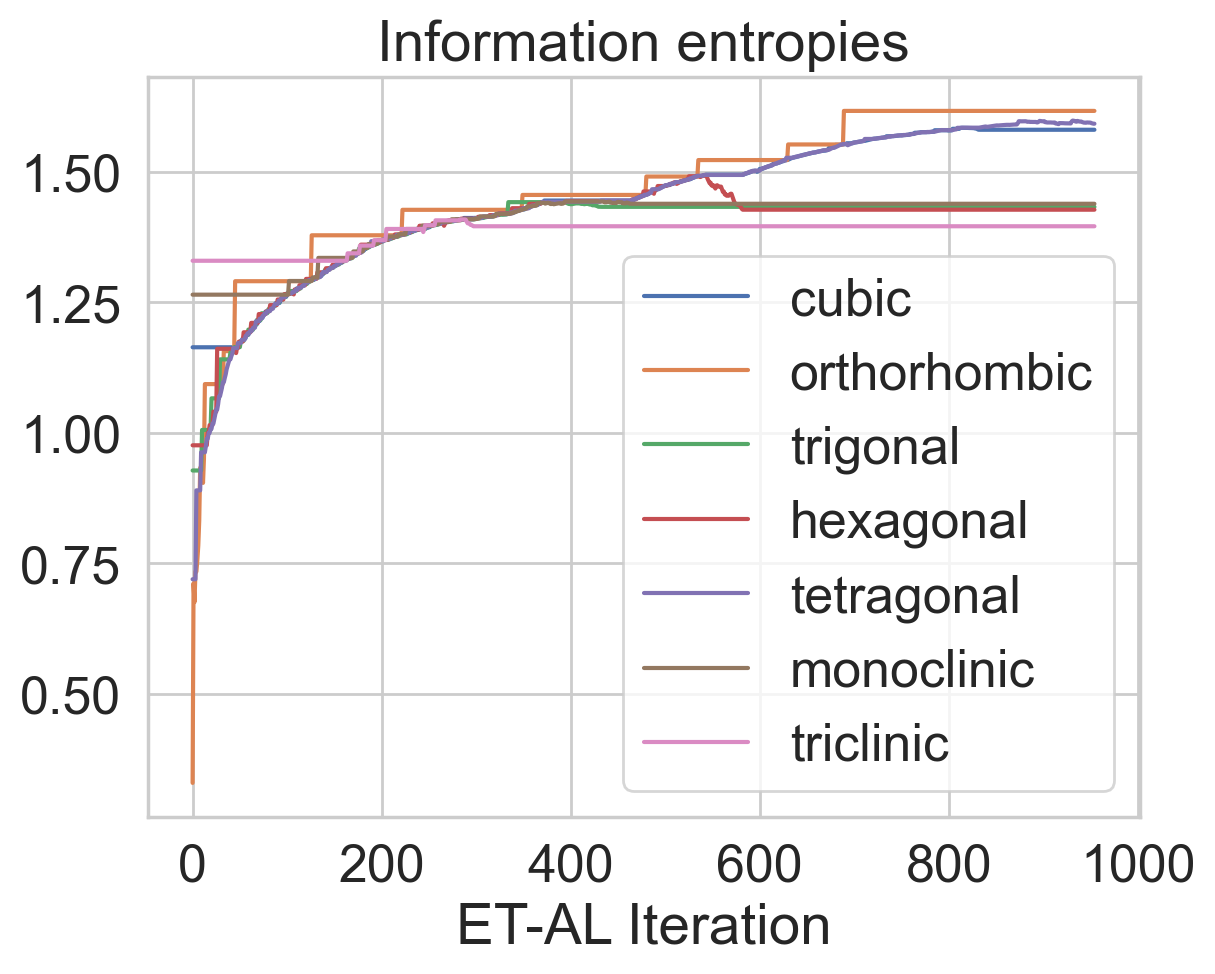

In [9]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(dpi=200)
for col in entropies:
    ax.plot(entropies[col], label=col)
    print(col)
ax.legend(loc=4)
plt.title('Information entropies')
plt.xlabel('ET-AL Iteration')
plt.savefig(results_path + 'info_entropy_evolution.svg', bbox_inches='tight')
# plt.savefig(results_path + 'info_entropy_evolution.png', dpi=200, bbox_inches='tight')

In [10]:
data_l = pd.read_pickle(results_path + 'data_l.pkl')
data_test = pd.read_pickle(results_path + 'data_test.pkl')
sample_path = np.load(results_path + 'sample_path.npy').astype(int)
samples = sample_path[sample_path != 0]
data_u = data_cleaned.drop(index=data_l.index.union(data_test.index), inplace=False)
# data_l_etal = 

In [11]:
samples_etal = data_cleaned.loc[samples]
samples_rand = data_u.sample(n=samples.shape[0], random_state=42)

data_l_etal = pd.concat([data_l, samples_etal])
data_l_rand = pd.concat([data_l, samples_rand])

In [12]:
data_l_rand.shape

(1954, 64)

### tSNE plots
Visualization using 2D tSNE mapping of `cgcnn` features.

In [13]:
cgcnn_features_all = pd.read_pickle('D:/ET-AL/Jarvis_cfid/cgcnn_features_sorted.pkl').feature
cgcnn_features = cgcnn_features_all.loc[data_cleaned.index]
cgcnn_features_test = pd.Series([np.asarray(row) for row in cgcnn_features], index=data_cleaned.index)
features = np.stack(cgcnn_features.values)

In [15]:
from sklearn.manifold import TSNE
cgcnn_tsne = TSNE(n_components=2, learning_rate='auto', perplexity=50, init='pca').fit_transform(features)
cgcnn_tsne = pd.DataFrame(cgcnn_tsne, columns=['tsne1', 'tsne2'], index=data_cleaned.index)
cgcnn_tsne['crys'] = data_cleaned['crys']

c:\Users\hzz6536\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


"\ncgcnn_tsne['dataset'] = pd.NaT\nfor idx, row in cgcnn_tsne.iterrows():\n    if idx in data_test.index:\n        cgcnn_tsne.at[idx, 'dataset'] = 'test'\n    elif idx in data_l.index:\n        cgcnn_tsne.at[idx, 'dataset'] = 'labeled'\n    else:\n        cgcnn_tsne.at[idx, 'dataset'] = 'unlabeled'\n"

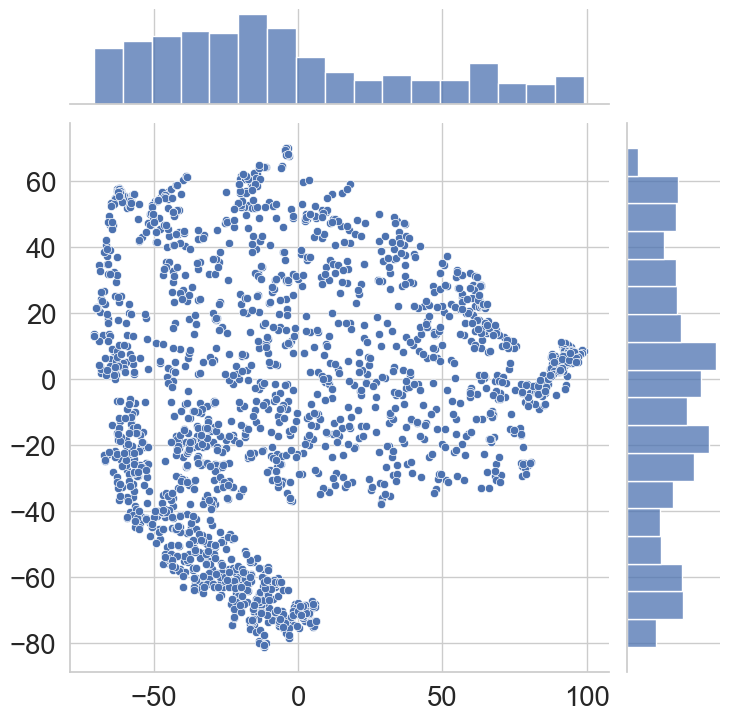

In [16]:
import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
sns.set_theme(style='whitegrid', font_scale=1.8)
h = sns.jointplot(data=cgcnn_tsne.loc[data_l_etal.index], x='tsne1', y='tsne2', height=8)
h.set_axis_labels()
plt.savefig('D:/ET-AL/plots/tsne_labeled.svg')

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
h = sns.kdeplot(data=cgcnn_tsne.loc[data_l.index], x='tsne1', y='tsne2', fill=True, cmap=sns.color_palette("light:b", as_cmap=True), cbar=True, cbar_kws={'ticks': []})
h.set(xlim=(-90,110), ylim=(-95,80))
plt.xlabel('')
plt.ylabel('')
plt.title('Labeled set', fontdict={'size': 24})
plt.savefig('D:/ET-AL/plots/tsne_labeled_kde.svg')

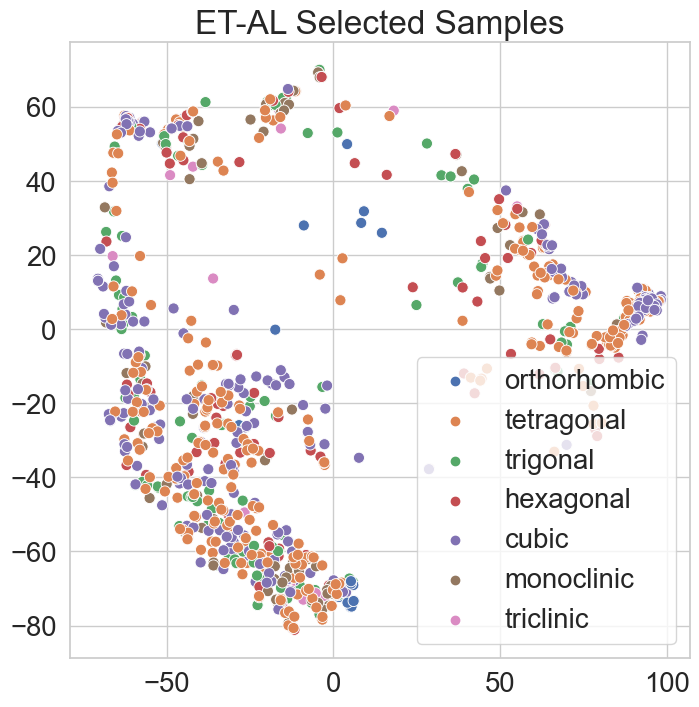

In [17]:
sns.set_theme(style='whitegrid', font_scale=1.8)
f, ax = plt.subplots(figsize=(8, 8))
hue_order = ['orthorhombic', 'tetragonal', 'trigonal', 'hexagonal', 'cubic', 'monoclinic', 'triclinic']
# hue_order = ['cubic', 'hexagonal', 'trigonal', 'tetragonal', 'orthorhombic', 'monoclinic', 'triclinic']
h = sns.scatterplot(data=cgcnn_tsne.loc[samples_etal.index], x='tsne1', y='tsne2', hue='crys', hue_order=hue_order, s=64)
h.set(xlabel=None, ylabel=None)
legend = h.legend()
plt.title('ET-AL Selected Samples', fontdict={'size':24})
plt.savefig('D:/ET-AL/plots/tsne_etal.svg')

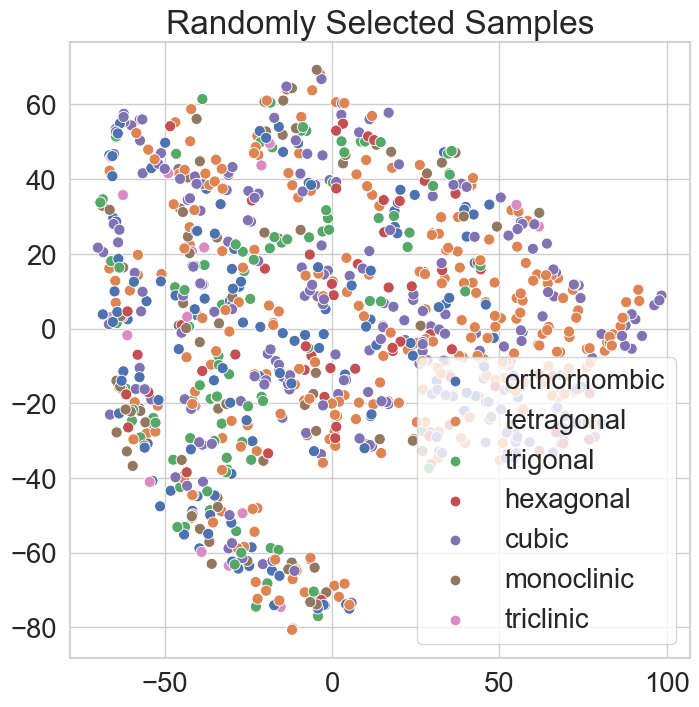

In [18]:
sns.set_theme(style='whitegrid', font_scale=1.8)
f, ax = plt.subplots(figsize=(8, 8))
h = sns.scatterplot(data=cgcnn_tsne.loc[samples_rand.index], x='tsne1', y='tsne2', hue='crys', hue_order=hue_order, s=64)
h.set(xlabel=None, ylabel=None)
legend = h.legend()
plt.title('Randomly Selected Samples', fontdict={'size':24})
plt.savefig('D:/ET-AL/plots/tsne_rand.svg')

### Visualize the locations of most improved samples

In [ ]:
# Load or define most improved samples' indices: `gb_G_mis`, `gb_B_mis`, `rf_G_mis``rf_B_mis`
rf_B_errors = [46765, 23728, 34293, 34426, 30965, 28127, 46717, 25633, 14748,
            43441,  8207, 11056,  1746, 27800, 30292, 21453, 10206,   137,
            28088, 29501, 48768,  3023, 29654, 26960, 45133, 37918, 26799,
            10468,  7174, 38194]
rf_G_errors = [34293, 34426, 46765, 23728, 35229,  3023,  4532,  2298, 34920,
            10263, 30965, 23709, 37799, 46035, 30401, 41128, 23395, 14748,
            43441, 13812, 28127, 32778, 36101, 42598, 41441, 23144,   137,
            12004, 31588, 22908]
gb_G_errors = [34293, 34426, 46765, 23728, 35229, 29605, 23502, 13426, 40548,
             3023, 13812,   137, 14748, 43441, 38003, 25087,  9198, 32778,
            20682, 23071, 24874, 35004, 21786, 24957, 28127,  8883,  4532,
            35921, 13011, 40290]
gb_B_errors = [29923, 34293, 34426, 46765, 23728, 23250, 37509, 25494, 28340,
            24220, 14748, 43441,   137, 13638, 41338, 40198, 27800, 26960,
            30292, 36437, 29506,  7174,  1746, 20347, 25006, 23761, 16188,
            35229, 13812, 23377]
sns.set_theme(style='whitegrid', font_scale=1.8)
f, ax = plt.subplots(figsize=(8, 8))
h = sns.scatterplot(data=cgcnn_tsne.loc[data_test.index], x='tsne1', y='tsne2', color='#5091cd')
plt.scatter(cgcnn_tsne.loc[gb_G_mis, 'tsne1'], cgcnn_tsne.loc[gb_G_mis, 'tsne2'], marker ='^', s=100, c='#ef553f', label='gradient boost')
plt.scatter(cgcnn_tsne.loc[rf_G_mis, 'tsne1'], cgcnn_tsne.loc[rf_G_mis, 'tsne2'], marker ='v', s=100, c='#ffc520', label = 'random forest')
plt.legend(loc=4), 
h.set(xlabel=None, ylabel=None)
plt.title('Most Improved Samples - G')
plt.savefig('D:/ET-AL/plots/tsne_improv_G.svg')

f, ax = plt.subplots(figsize=(8, 8))
h = sns.scatterplot(data=cgcnn_tsne.loc[data_test.index], x='tsne1', y='tsne2', color='#5091cd')
plt.scatter(cgcnn_tsne.loc[gb_B_mis, 'tsne1'], cgcnn_tsne.loc[gb_B_mis, 'tsne2'], marker ='^', s=100, c='#ef553f', label='gradient boost')
plt.scatter(cgcnn_tsne.loc[rf_B_mis, 'tsne1'], cgcnn_tsne.loc[rf_B_mis, 'tsne2'], marker ='v', s=100, c='#ffc520', label = 'random forest')
plt.legend(loc=4), 
h.set(xlabel=None, ylabel=None)
plt.title('Most Improved Samples - B')
plt.savefig('D:/ET-AL/plots/tsne_improv_B.svg')